**Questions related job referral can be answered in this jupyter notebook:**
- Question 1. During which time range in a year, do we have the most amount of referrals provided? 
   We can plan our job hunting time accordingly.
- Question 2. What are the top companies offering the largest number of referral opportunities? Have they changed over the past several years?

- Question 3. Who has created the largest amount of referrals?

In [19]:
import re
import time
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('referral_US.csv', encoding='utf-8')

In [21]:
df.shape

(4695, 7)

In [22]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4695 non-null   datetime64[ns]
 1   Poster      4590 non-null   object        
 2   Replies     4695 non-null   int64         
 3   Views       4695 non-null   int64         
 4   post_id     4695 non-null   int64         
 5   post_title  4695 non-null   object        
 6   company     4142 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 201.8+ KB


In [24]:
df.head()

,Date,Poster,Replies,Views,post_id,post_title,company
0,2020-11-15,LBS,11,898,687923,推特-内推 (大组有大量HC）,Twitter
1,2020-11-15,LinEBNG,2,344,687897,Miles - 长期内推- 我们公司招人，各种职位,Miles
2,2020-11-14,hsywc2333,2,184,687779,citi 内推 不限职位地区 需简历和jobid 非诚勿扰,citi
3,2020-11-14,chriszkz,4,635,687647,【字节跳动】【TikTok】【急招】【社招】【内推】,字节跳动
4,2020-11-13,mandysz2,3,621,687330,Bytedance / TikTok北美强势招聘，校招 / 全职 / 实习，AML等组火热招...,字节跳动


### Remove the post containing "求内推(asking for help)"

In [25]:
df['is_referral'] = df['post_title'].apply(lambda x :0 if '求' in x else 1)

In [26]:
df.head(5)

,Date,Poster,Replies,Views,post_id,post_title,company,is_referral
0,2020-11-15,LBS,11,898,687923,推特-内推 (大组有大量HC）,Twitter,1
1,2020-11-15,LinEBNG,2,344,687897,Miles - 长期内推- 我们公司招人，各种职位,Miles,1
2,2020-11-14,hsywc2333,2,184,687779,citi 内推 不限职位地区 需简历和jobid 非诚勿扰,citi,1
3,2020-11-14,chriszkz,4,635,687647,【字节跳动】【TikTok】【急招】【社招】【内推】,字节跳动,1
4,2020-11-13,mandysz2,3,621,687330,Bytedance / TikTok北美强势招聘，校招 / 全职 / 实习，AML等组火热招...,字节跳动,1


In [27]:
# Remove the post requesting help.
df = df[df['is_referral']==1]; len(df)

3995

# - Question 1. During which time range in a year, do we have the most amount of referrals provided? 


## Lets count how many posts created for each day.

Text(0.5, 1.0, 'daily number of posts for all years')

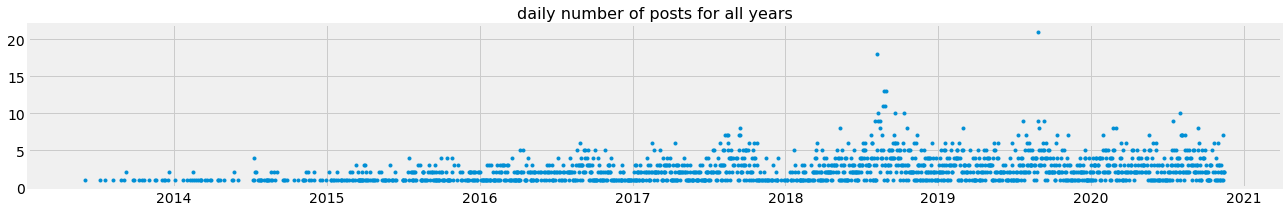

In [28]:
daily_count = df.groupby('Date').count()

plt.figure(figsize=(20,3))
plt.plot(daily_count['post_id'], marker='.', linestyle='')
# plt.xlim((pd.to_datetime('2014-07-01'), pd.to_datetime('2020-07-01')))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('daily number of posts for all years',fontsize=16)

### Make weekly counts

In [29]:
df = df.set_index('Date')

Text(0.5, 1.0, 'Weekly counts of posts')

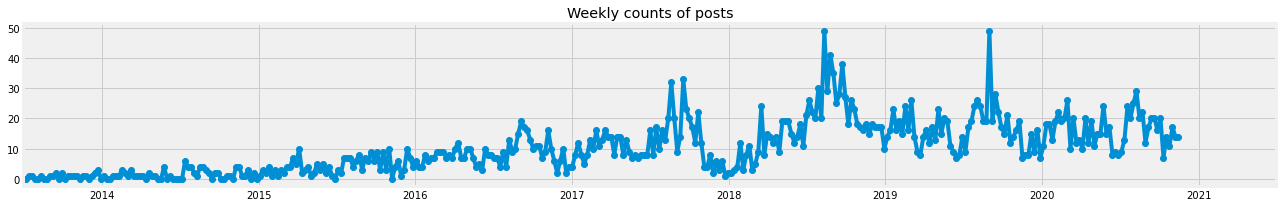

In [30]:
df_week_counts = df.resample('W').count() 

plt.figure(figsize=(20,3))
plt.xlim((pd.to_datetime('2013-07-01'), pd.to_datetime('2021-07-01')))
plt.plot(df_week_counts.index, df_week_counts.Poster, marker='o', linestyle='-')
plt.title('Weekly counts of posts')

### Make Monthly counts

Text(0.5, 1.0, 'Monthly counts of posts')

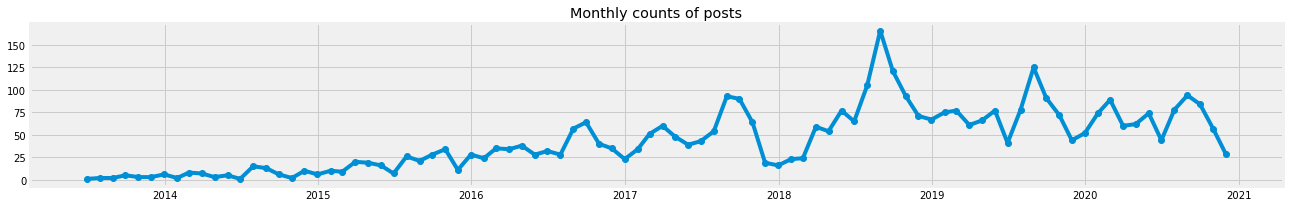

In [31]:
df_monthly_counts = df.resample('M').count()

plt.figure(figsize=(20,3))
plt.plot(df_monthly_counts.index, df_monthly_counts.Poster, marker='o', linestyle='-')
plt.title('Monthly counts of posts')

In [32]:
df_monthly_counts.head()

,Poster,Replies,Views,post_id,post_title,company,is_referral
Date,,,,,,,
2013-06-30,1,1,1,1,1,1,1
2013-07-31,2,2,2,2,2,2,2
2013-08-31,2,2,2,2,2,2,2
2013-09-30,5,5,5,5,5,4,5
2013-10-31,3,3,3,3,3,3,3


#### We can see that the September is the peak month in the year for companies offering opportunities.

Text(0.5, 1.0, 'Rolling averages of daily posts offering internal referrals')

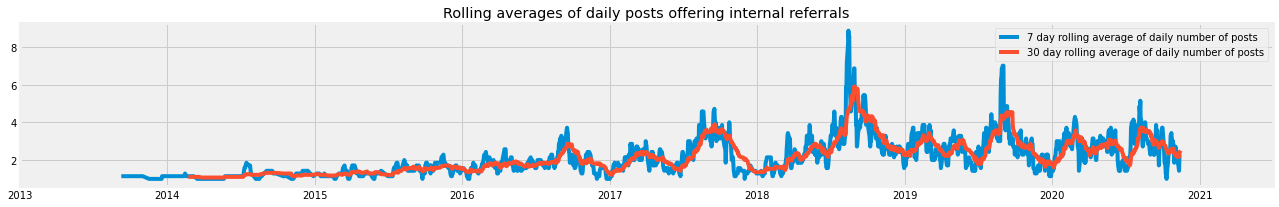

In [33]:
df_new = df.groupby('Date').count()

daily_post_avg_7 = df_new.rolling(7).mean()['Poster']
daily_post_avg_30 = df_new.rolling(28).mean()['Poster']

plt.figure(figsize=(20, 3))
plt.plot(daily_post_avg_7, label='7 day rolling average of daily number of posts')
plt.plot(daily_post_avg_30, label='30 day rolling average of daily number of posts')
plt.xlim((pd.to_datetime('2013-01-01'), pd.to_datetime('2021-07-01')))
plt.legend()
plt.title('Rolling averages of daily posts offering internal referrals')
# plt.xticks([0, 1, 2], ['January', 'February', 'March'])

## - Question 2. What are the top companies offering the largest number of referral opportunities? Have they changed over the past several years?

In [34]:
posts_per_company = df['company'].value_counts()[:20]; posts_per_company.head()

Amazon       688
Google       315
Facebook     277
Microsoft    114
Uber          93
Name: company, dtype: int64

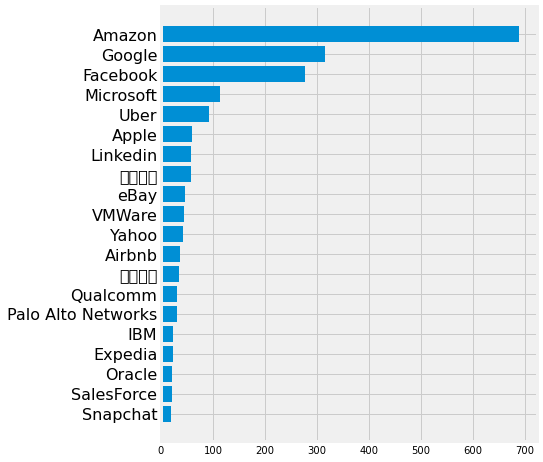

In [35]:
plt.figure(figsize=(6,8))
plt.barh(posts_per_company.index, posts_per_company.values)
plt.yticks(fontsize=16)
plt.gca().invert_yaxis()

## - Question 3. Who has created the largest amount of referrals?
### Top ten author ordered by number of posts and average views

In [36]:
poster_info = df.groupby(['Poster']).agg({'Views': ['count','sum', 'mean', 'min', 'max'], 'Replies': ['mean', 'min', 'max']})
poster_info.columns = ['_'.join(x) for x in poster_info.columns.ravel()]
poster_info.sort_values(by=['Views_count', 'Views_mean'], ascending=False).head(10)

,Views_count,Views_sum,Views_mean,Views_min,Views_max,Replies_mean,Replies_min,Replies_max
Poster,,,,,,,,
amazreferal,31,95081,3067.129032,419,14494,31.548387,1,247
lindaxia2003,14,47421,3387.214286,122,7618,25.500000,0,68
地里小马甲,14,39400,2814.285714,739,8812,20.928571,0,109
鸟月月,13,119752,9211.692308,4719,17509,130.769231,60,317
wanghwadad,13,106329,8179.153846,2343,32185,120.000000,19,678
GetBusyLiving,13,33464,2574.153846,107,7169,25.769231,1,98
斯卡洛夫斯基,12,52378,4364.833333,1855,8501,12.333333,2,48
JerryAi,12,19951,1662.583333,737,3726,10.666667,0,47
Warald,10,123419,12341.900000,1818,35615,33.900000,0,169
